# References

- [1] https://www.geeksforgeeks.org/nlp-gensim-tutorial-complete-guide-for-beginners/
- [2] https://radimrehurek.com/gensim/auto_examples/core/run_core_concepts.html#sphx-glr-download-auto-examples-core-run-core-concepts-py
- [3] https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92#e71b

# Intro to Gensim

- Gensim with its tagline "Topic Modelling for Humans"
- Open-source python library written by Radim Rehurek, used in unsupervised topic modelling and NLP.
- It can handle large text collection
- Provides multi-processing implementations for various algorithm to increase processing speed

In [2]:
## installation
# !pip install gensim

# Core Concept [2]

## Document

- In Gensim, a document is an object of the text sequence type (commonly known as `str` in Python 3)
- It could be anything from a short 140 character teweet, a single paragraph, a news article, app description, app review, or a book 

In [14]:
document = "Human machine interface for lab abc computer applications"

## Corpus

- Corpus is a collection of *Documents* objects.
- Serve 2 roles:
 - Input for training a model
 - Documents to organize. After training, a topic model can be used to extract topics from new documents

In [3]:
import pprint

text_corpus = [
    "Human machine interface for lab abc computer applications",
    "A survey of user opinion of computer system response time",
    "The EPS user interface management system",
    "System and human system engineering testing of EPS",
    "Relation of user perceived response time to error measurement",
    "The generation of random binary unordered trees",
    "The intersection graph of paths in trees",
    "Graph minors IV Widths of trees and well quasi ordering",
    "Graph minors A survey",
]

# Create a set of frequent words
stoplist = set('for a of the and to in'.split(' '))
# Lowercase each document, split it by white space and filter out stopwords
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in text_corpus]

# Count word frequencies
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

# Only keep words that appear more than once
processed_corpus = [[token for token in text if frequency[token] > 1] for text in texts]
pprint.pprint(processed_corpus)

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]


In [4]:
# associate each word in the corpus with a unique integer ID

from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...)


- our corpus is small, there are only 12 unique tokens
- for larger purposes, dictionaries that contains hundreds of thousands of tokens are quite common 

## Vector

- This is the way to represent documents that we can manipulate mathematically
- Represent each document as a vector of features
- For example, single feature can be thought of as a question-answer pair

In [5]:
pprint.pprint(dictionary.token2id)

{'computer': 0,
 'eps': 8,
 'graph': 10,
 'human': 1,
 'interface': 2,
 'minors': 11,
 'response': 3,
 'survey': 4,
 'system': 5,
 'time': 6,
 'trees': 9,
 'user': 7}


In [6]:
new_doc = "Human computer interaction"
new_vec = dictionary.doc2bow(new_doc.lower().split())
print(new_vec)

[(0, 1), (1, 1)]


In [7]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]
pprint.pprint(bow_corpus)

[[(0, 1), (1, 1), (2, 1)],
 [(0, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)],
 [(2, 1), (5, 1), (7, 1), (8, 1)],
 [(1, 1), (5, 2), (8, 1)],
 [(3, 1), (6, 1), (7, 1)],
 [(9, 1)],
 [(9, 1), (10, 1)],
 [(9, 1), (10, 1), (11, 1)],
 [(4, 1), (10, 1), (11, 1)]]


## Model

- Transform the vectorized corpus using models
- Model is abstract term referring to a transformation from one document representation to another 

In [8]:
from gensim import models

# train the model
tfidf = models.TfidfModel(bow_corpus)

# transform the "system minors" string
words = "system minors".lower().split()
print(tfidf[dictionary.doc2bow(words)])

[(5, 0.5898341626740045), (11, 0.8075244024440723)]


In [9]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[bow_corpus], num_features=12)

In [10]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

[(0, 0.0), (1, 0.32448703), (2, 0.41707572), (3, 0.7184812), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]


How to read this output?

- Document 1 has 32% similarity, document 2 has 41% similarity

In [12]:
for document_number, score in sorted(enumerate(sims), key=lambda x: x[1], reverse=True):
    print(document_number, score)

3 0.7184812
2 0.41707572
1 0.32448703
0 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0


## Summary

- There are 4 core concepts of Gensim as mentioned above
- The actions:
 - Start with a corpus of documents
 - Transform these documents to a vector space representation
 - Create the model that transformed the original vector representation to *Tfldf*
 - Finally, we used our model to calculate the similarity between some query document and all documents in the corpus

# A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model [3]

## What is Word Embedding?

- One of the most important techniques in NLP, where wrods are mapped to vectors of real numbers.
- Enable machine to capture the meaning of a word in a document, semantic, and syntactic similarity, relation with other words.
- Also be used for recommender systems and text classification
- This tutorial showing an example of generating word embedding for vehicle make model

## Pre-processing

In [16]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [17]:
df['Maker_Model']= df['Make']+ " " + df['Model']

# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
df_clean = pd.DataFrame({'clean': df2})

In [27]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]

# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

## Gensim word2vec Model Training

In [29]:
from gensim.models import Word2Vec
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [30]:
model['Toyota Camry']

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.2233995 , -0.01145452, -0.00775272,  0.02479881,  0.0236364 ,
        0.07383364, -0.1644411 , -0.46307307,  0.20235954,  0.01040629,
        0.04559759, -0.04916029,  0.06710637, -0.03868091, -0.15977049,
       -0.0132838 ,  0.07960529,  0.0130666 ,  0.15592852, -0.07098096,
        0.12513608,  0.11348618, -0.1377846 ,  0.08889905, -0.08692455,
        0.17357963, -0.02401142, -0.1406819 , -0.13061988, -0.13961707,
        0.07256291, -0.03225642,  0.03935038,  0.09572152, -0.01627416,
       -0.0762926 , -0.31989   ,  0.0010285 ,  0.10900949, -0.12964308,
       -0.03264824, -0.10252802,  0.2610925 , -0.04009392,  0.3099276 ,
       -0.05856619,  0.06382877, -0.08939064,  0.05775972,  0.06697481],
      dtype=float32)

## Compute Similarities

In [31]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8718583

In [32]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9588856

In [34]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Maserati Coupe', 0.9961352348327637),
 ('Chrysler Crossfire', 0.995536744594574),
 ('Bentley Continental GTC', 0.9953990578651428),
 ('Cadillac ATS-V', 0.995012640953064),
 ('Ford Shelby GT350', 0.9942083954811096)]

## T-SNE Visualizations

T-SNE is a visualization tool for high-dimensional data by dimension reduction while keeping relative pairwise distance between points

In [44]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    
    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)

    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


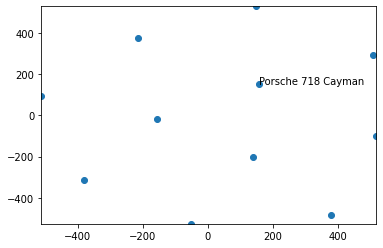

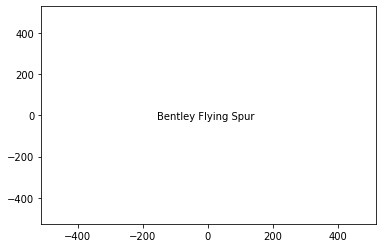

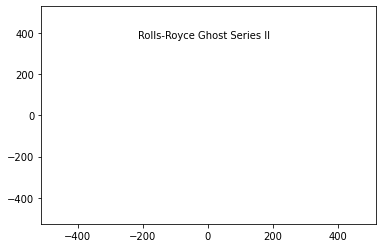

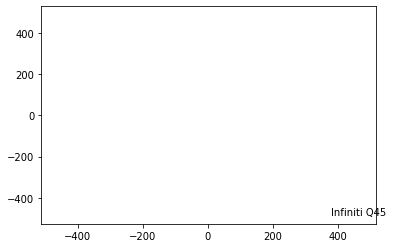

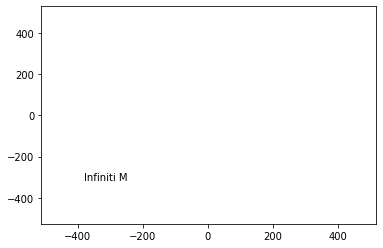

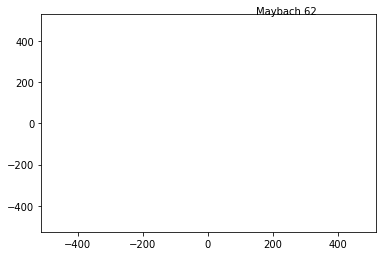

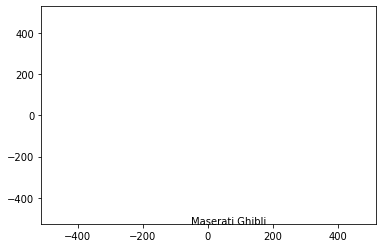

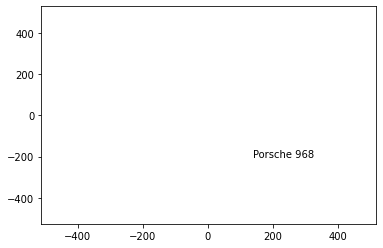

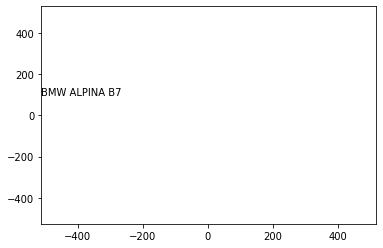

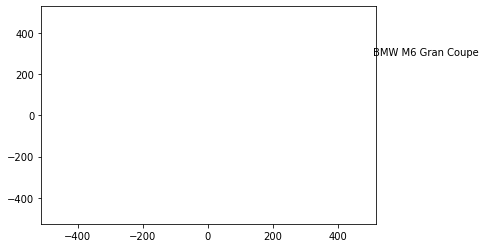

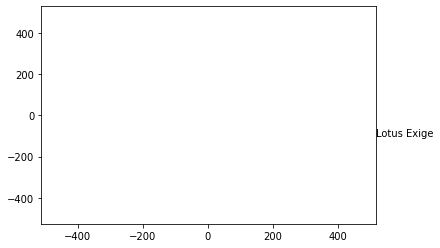

In [54]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50)
# display_closestwords_tsnescatterplot(model, 'Maserati Coupe', 50)